# Analysis of the synthetic calibration of the equilirium MD1 runs

## 10% parameter variance (corrected verions)

In [1]:
import sys,os
# get utils path (one fodelr up)
curr_dir = os.getcwd()
one_folder_up = os.path.dirname(curr_dir)
sys.path.append(one_folder_up)
import numpy as np
import pandas as pd
import utils as ut
from matplotlib import pyplot as plt
%matplotlib inline

/var/folders/pp/ngxp2dxn1jgf7zs0yss75xxc0000gn/T/ipykernel_55659/3557299640.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


check the spread in the results w.r.t. targets

In [ ]:
sa_path='all-md1-setup-files-20per-corr/check_all-run/'
model='results.csv'
params='sample_matrix.csv'
df_model = pd.read_csv(sa_path+model,header=None)
df_param = pd.read_csv(sa_path+params)
#print(df_param.head())


model_header =  ['GPP0','GPP1','GPP2','GPP3',\
                 'NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03','CarbonShallow','CarbonDeep',\
                 'CarbonMineralSum','AvailableNitrogenSum'
                   ]
df_model.columns = model_header
df_model.head()

param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22',
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22',\
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22',\
               'micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'
               ]
df_param.columns = param_header

df_model.head()
df_param.head()

ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

# Workflow:
## Above-ground
### (1) cmax -> GPP
### (2) nmax, krb -> NPP, VEGC
### (3) cfall -> NPP, VEGC
### (4) nfall -> NPP, VEGC,VEGN
## Below-ground
### (5) soil param -> NPP, VEGC,VEGN, SoilC

In [2]:
ls yaml/

config-cfall-npp-vegc-md1.yaml       config-nfall-npp-vegc-vegn-md1.yaml
config-cmax-gpp-md1.yaml             config-nmax-krb-npp-cfall-md1.yaml


In [3]:
path='csv/'
model='out-cmax-gpp.csv'
params='param-cmax-gpp.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header = ['GPP0','GPP1','GPP2','GPP3']
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['cmax0','cmax1','cmax2','cmax3']
df_param.columns = param_header
df_model

,GPP0,GPP1,GPP2,GPP3
0,307.172285,24.609850,50.009042,52.872021
1,313.202230,26.186424,14.585567,41.578677
2,307.170000,24.610000,50.010000,52.870000


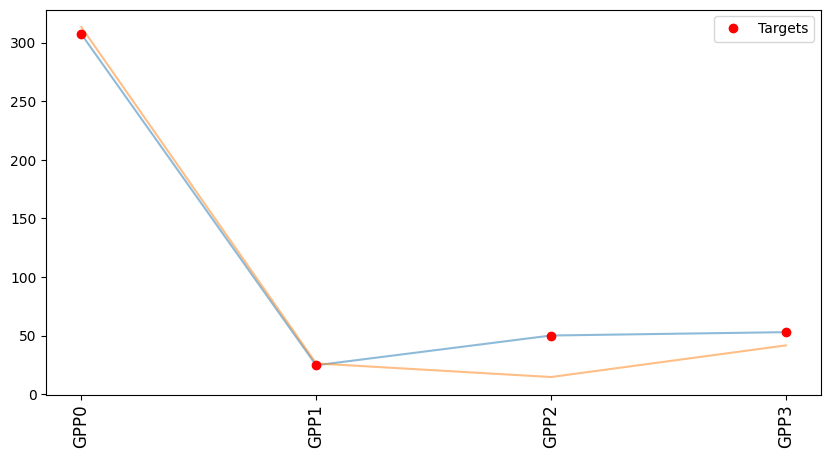

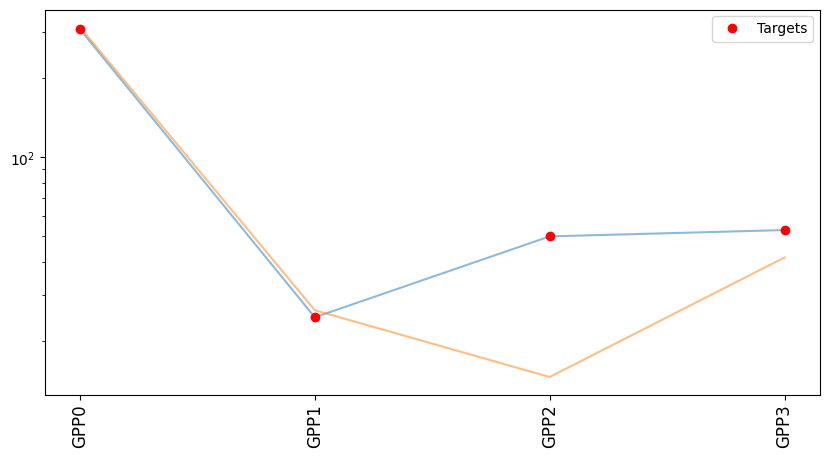

In [4]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

array([2.56113984e-06, 3.55314342e+02])

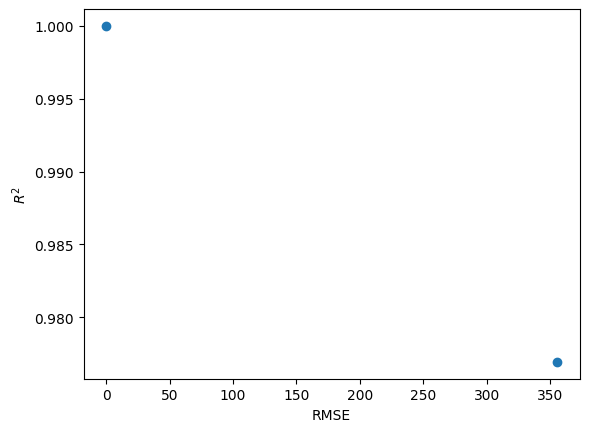

In [5]:
ut.plot_r2_rmse(df_model)

In [6]:
xparams, ymodel = ut.get_params_r2_rmse(df_param,df_model,r2lim=0.97)
xparams

,cmax0,cmax1,cmax2,cmax3,$R^2$,RMSE,MAPE,COMBINED_ACC
0,381.55,115.20,218.27,93.37,1.00000,0.000003,0.000018,1.00000
1,393.00,121.79,65.20,73.43,0.97693,355.314342,0.694939,-0.02307


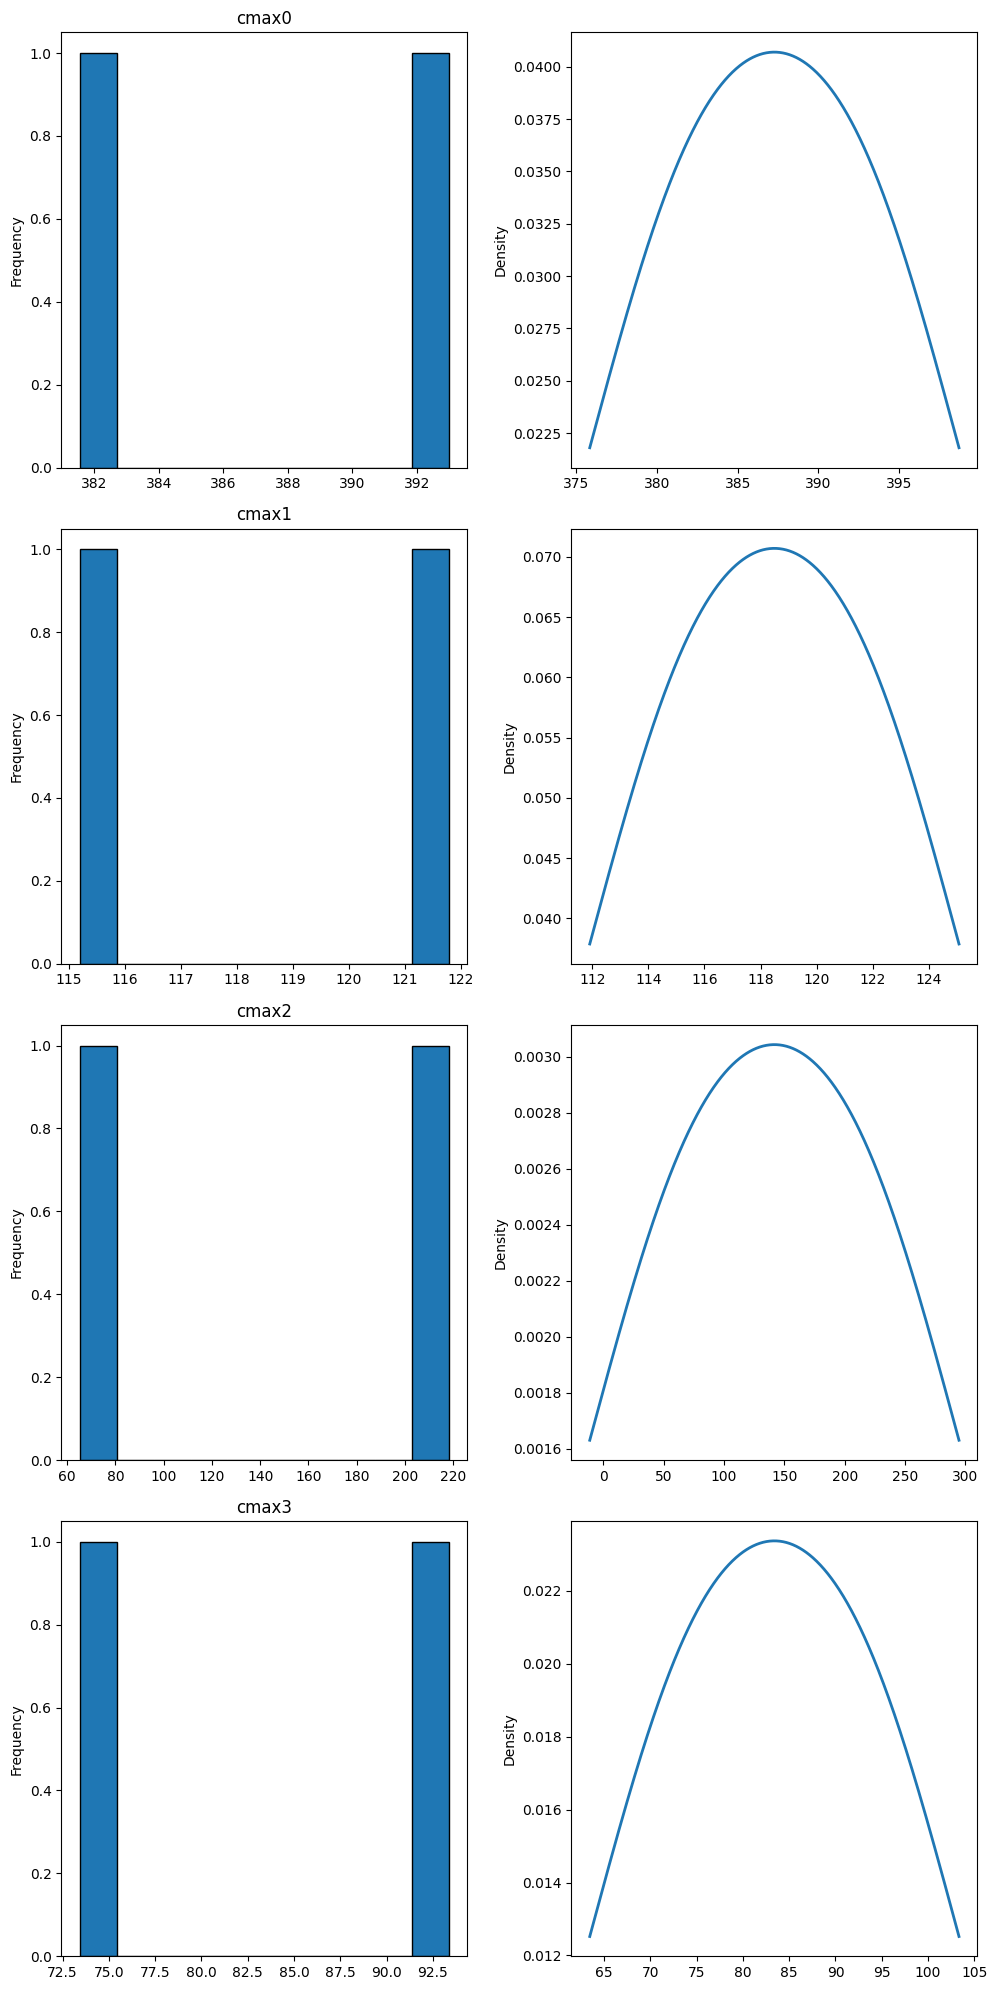

In [7]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [8]:
def z_score(y_short,y_long):
    '''
    NOTE: this function assumes that last row in y_long is target
    
    y_short: model dataframe restricted by R2
    y_long : full model dataframe 
    '''
    zscore=[]
    print('mean-obs','std')
    for iname in y_long.columns:
        zscore.append((y_short[iname].mean()-y_long[iname].iloc[-1])/y_short[iname].std())
        print (y_short[iname].mean()-y_long[iname].iloc[-1],y_short[iname].std())
    df_z = pd.DataFrame(zscore)
    df_z.index = y_long.columns
    
    return df_z

xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
3.0172576475143273 4.263815263811118
0.7881373205780982 1.1148063713610508
-17.71269545689225 25.04817990323015
-5.644651050567624 7.98560007197604


,0
GPP0,0.707643
GPP1,0.706972
GPP2,-0.707145
GPP3,-0.706854


In [9]:
nelem=5
order=True
z_score(ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem],df_model)

mean-obs std
3.0172576475143273 4.263815263811118
0.7881373205780982 1.1148063713610508
-17.71269545689225 25.04817990323015
-5.644651050567624 7.98560007197604


,0
GPP0,0.707643
GPP1,0.706972
GPP2,-0.707145
GPP3,-0.706854


In [10]:
cmax_true_params = [381.19, 113.93, 210.48, 93.31]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
0,381.55,115.20,218.27,93.37,1.00000,0.000003,0.000018,1.00000,7.210685e-09,0.000026
1,393.00,121.79,65.20,73.43,0.97693,355.314342,0.694939,-0.02307,1.000266e+00,1.414402


In [11]:
df_model.iloc[-1]

GPP0    307.17
GPP1     24.61
GPP2     50.01
GPP3     52.87
Name: 2, dtype: float64

In [12]:
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,GPP0,GPP1,GPP2,GPP3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
0,307.172285,24.609850,50.009042,52.872021,1.00000,0.000003,0.000018,1.00000,7.210685e-09,0.000026
1,313.202230,26.186424,14.585567,41.578677,0.97693,355.314342,0.694939,-0.02307,1.000266e+00,1.414402


In [13]:
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cmax0,cmax1,cmax2,cmax3,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
0,381.55,115.20,218.27,93.37,1.00000,0.000003,0.000018,1.00000,7.210685e-09,0.000026
1,393.00,121.79,65.20,73.43,0.97693,355.314342,0.694939,-0.02307,1.000266e+00,1.414402


## (2) nmax, krb -> NPP, VEGC

In [15]:
model='out-nmax-krb-npp-vegc.csv'
params='param-nmax-krb-npp-vegc.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = ['nmax0','nmax1','nmax2','nmax3',
               'krb00','krb01','krb02','krb03',\
               'krb10','krb11','krb12',\
               'krb20','krb21','krb22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,150.149378,10.378448,26.877533,23.789650,568.459595,1909.200024,224.761852,7.603170,94.722411,12.320021,4.544091,456.999243,8.187589,142.397963
1,150.864962,11.058660,25.921434,23.920963,567.430627,1932.508154,221.191977,7.776855,107.826350,14.185763,4.595418,429.187390,7.606801,143.182410
2,153.093869,10.552253,26.827178,24.029783,569.362207,1948.239282,229.894153,7.607648,99.763836,11.344590,4.540662,451.647455,8.375120,143.832838
3,151.764868,9.753375,27.201820,23.669913,568.474591,1934.094861,226.271698,7.598324,80.053178,11.170789,4.604741,458.724655,8.426078,141.680347
4,150.579933,11.326294,26.936747,23.549370,568.505634,1911.818518,226.452199,7.779414,115.591054,12.851772,4.657185,448.170813,8.432914,140.958188


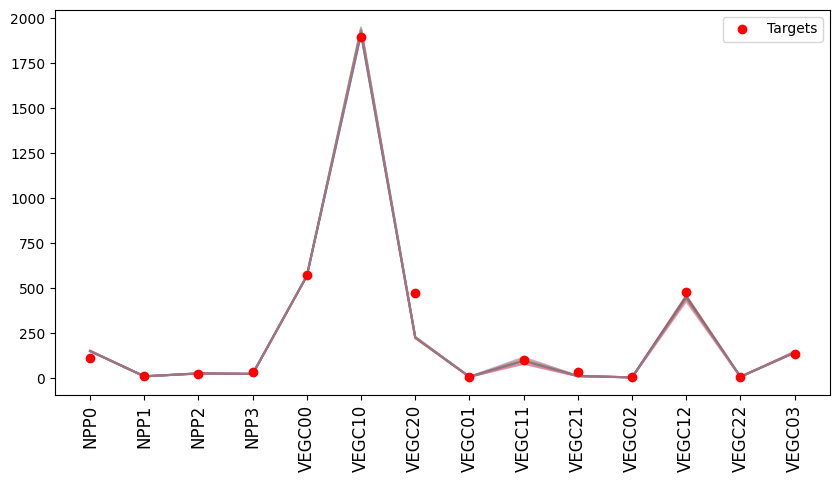

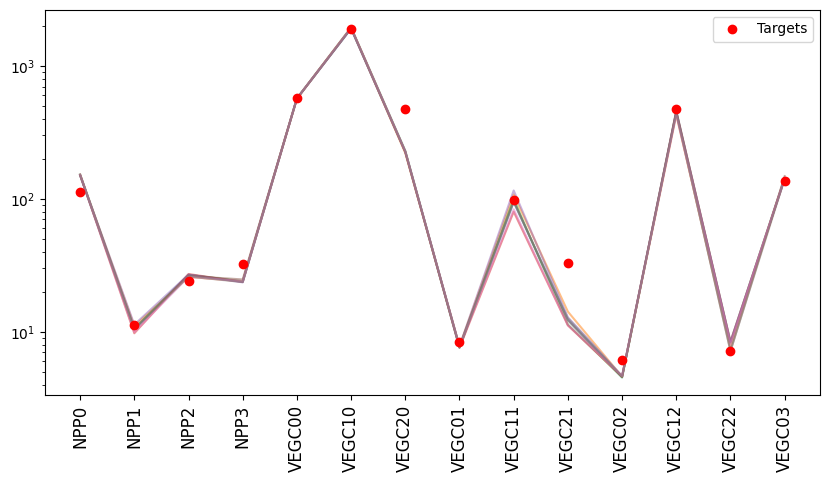

In [16]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

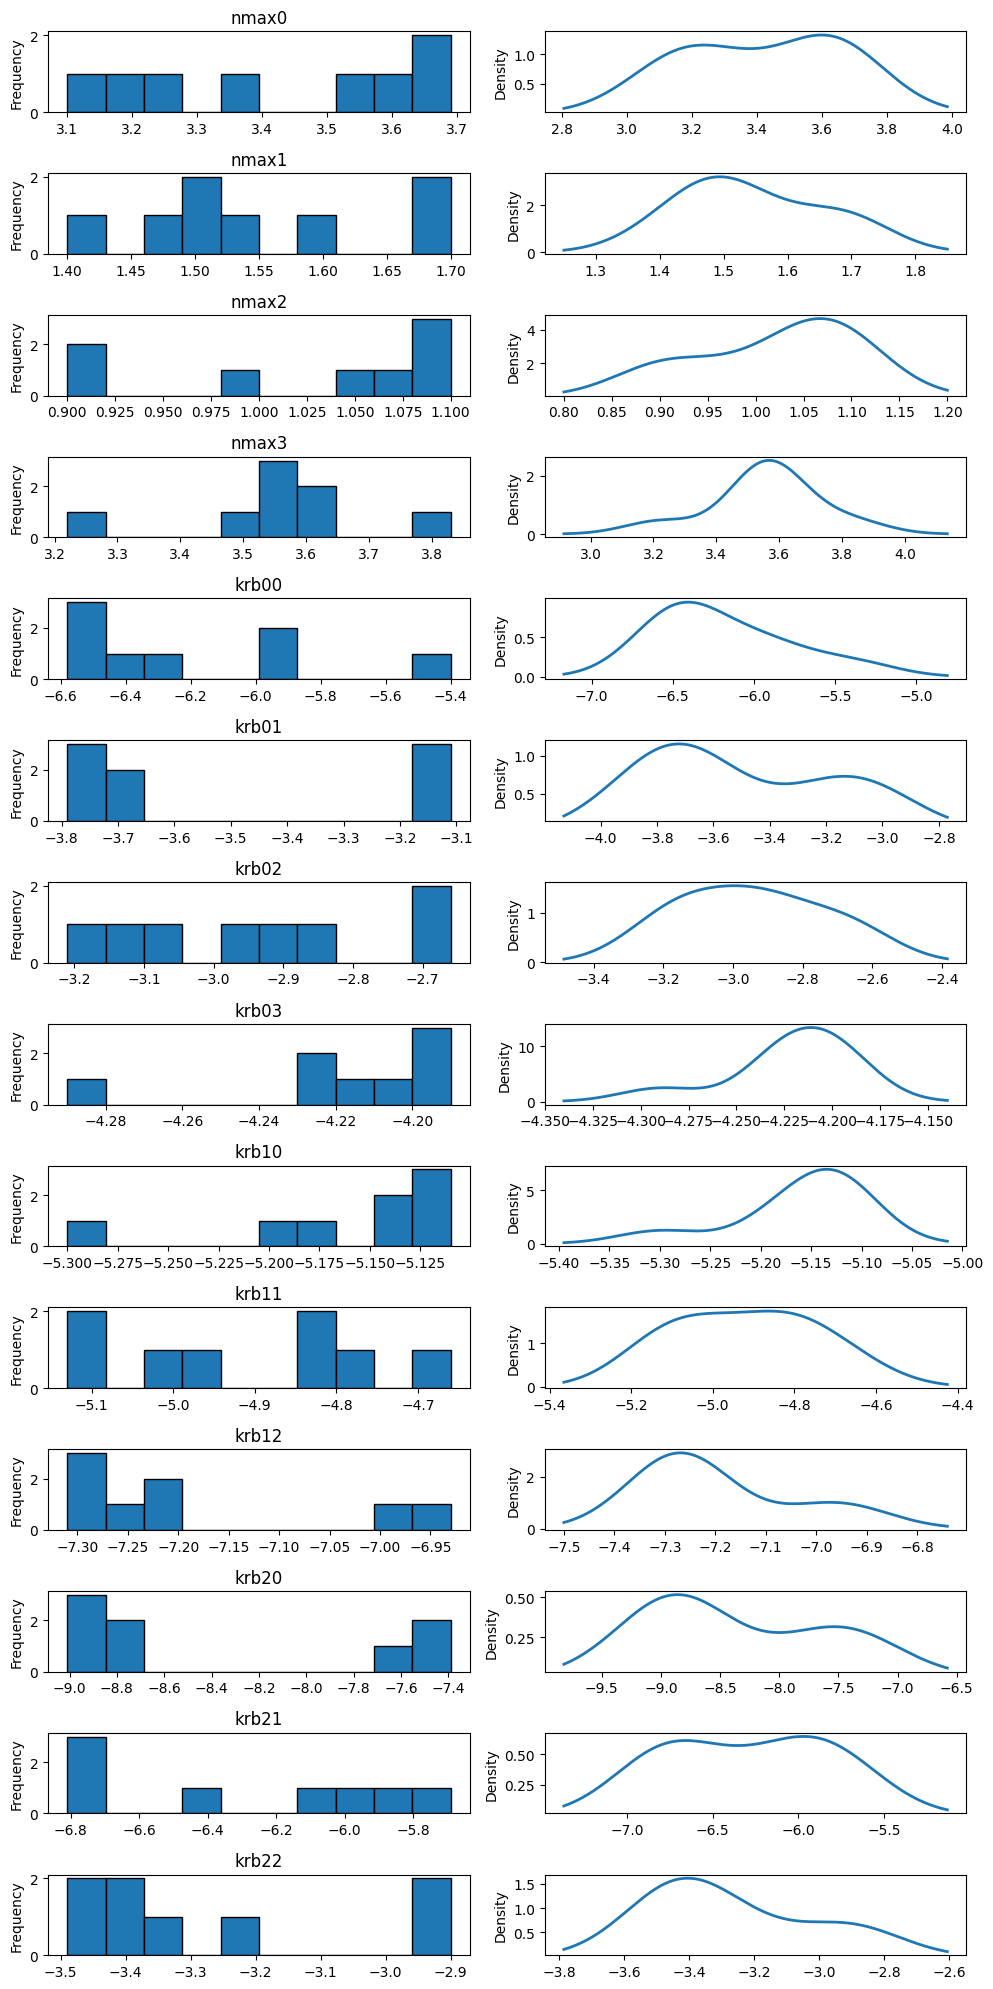

In [17]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [18]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
                    -6.0, -3.45, -2.95, -4.65, -4.88, -5.15, -6.65, -8.2, -6.2, -3.2]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,nmax0,nmax1,nmax2,nmax3,krb00,krb01,krb02,krb03,krb10,krb11,krb12,krb20,krb21,krb22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
7,3.35,1.52,1.09,3.57,-6.49,-3.68,-3.10,-4.20,-5.11,-4.83,-6.93,-8.86,-6.42,-2.91,0.980695,4628.332654,0.291054,0.902639,0.925212,1.245103
4,3.65,1.70,0.99,3.51,-6.33,-3.75,-3.15,-4.19,-5.12,-5.13,-7.23,-8.83,-5.69,-3.49,0.980504,4640.773816,0.300960,0.814119,0.927702,1.266080
0,3.69,1.60,1.10,3.55,-6.37,-3.11,-2.69,-4.21,-5.12,-5.02,-7.26,-7.44,-6.80,-3.33,0.980500,4644.361542,0.309212,0.749567,0.928419,1.282791
2,3.18,1.69,1.06,3.22,-6.48,-3.11,-2.66,-4.23,-5.14,-5.13,-7.28,-8.94,-5.82,-3.47,0.981012,4693.111733,0.322822,0.586543,0.938149,1.316895
5,3.61,1.49,1.04,3.53,-5.92,-3.76,-2.96,-4.29,-5.17,-4.84,-7.23,-9.01,-6.01,-2.90,0.980401,4703.102919,0.296608,0.762480,0.940158,1.266851
3,3.22,1.46,1.08,3.64,-5.92,-3.12,-2.88,-4.20,-5.19,-4.77,-7.31,-8.74,-6.74,-3.43,0.980696,4720.190641,0.349310,0.358288,0.943567,1.374888
6,3.10,1.40,0.90,3.83,-6.58,-3.66,-3.21,-4.23,-5.13,-4.66,-6.99,-7.39,-6.03,-3.41,0.980206,4843.308370,0.338388,0.272841,0.968177,1.369603
1,3.56,1.50,0.91,3.60,-5.40,-3.79,-2.92,-4.22,-5.30,-4.98,-7.31,-7.63,-6.81,-3.21,0.979374,5003.546354,0.280277,0.479374,1.000213,1.282275


In [19]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0       113.08
NPP1        11.30
NPP2        24.02
NPP3        32.41
VEGC00     572.36
VEGC10    1894.03
VEGC20     474.55
VEGC01       8.35
VEGC11      98.90
VEGC21      33.19
VEGC02       6.14
VEGC12     477.80
VEGC22       7.17
VEGC03     136.54
Name: 8, dtype: float64


,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
7,150.940825,10.465362,26.048952,23.668984,568.699084,1917.310217,227.457408,7.738496,94.932692,12.656805,4.621052,443.080582,7.210567,141.678510,0.980695,4628.332654,0.291054,0.902639,0.925212,1.245103
4,150.579933,11.326294,26.936747,23.549370,568.505634,1911.818518,226.452199,7.779414,115.591054,12.851772,4.657185,448.170813,8.432914,140.958188,0.980504,4640.773816,0.300960,0.814119,0.927702,1.266080
0,150.149378,10.378448,26.877533,23.789650,568.459595,1909.200024,224.761852,7.603170,94.722411,12.320021,4.544091,456.999243,8.187589,142.397963,0.980500,4644.361542,0.309212,0.749567,0.928419,1.282791
2,153.093869,10.552253,26.827178,24.029783,569.362207,1948.239282,229.894153,7.607648,99.763836,11.344590,4.540662,451.647455,8.375120,143.832838,0.981012,4693.111733,0.322822,0.586543,0.938149,1.316895
5,150.781033,10.517637,26.282998,24.769124,568.265442,1918.719482,225.363319,7.757509,96.264957,12.205599,4.609117,445.391812,7.164460,148.259435,0.980401,4703.102919,0.296608,0.762480,0.940158,1.266851
3,151.764868,9.753375,27.201820,23.669913,568.474591,1934.094861,226.271698,7.598324,80.053178,11.170789,4.604741,458.724655,8.426078,141.680347,0.980696,4720.190641,0.349310,0.358288,0.943567,1.374888
6,152.218665,9.955372,25.913594,24.033179,569.246350,1938.451306,227.623909,7.732576,83.373008,11.244753,4.647670,428.161600,8.010119,143.855009,0.980206,4843.308370,0.338388,0.272841,0.968177,1.369603
1,150.864962,11.058660,25.921434,23.920963,567.430627,1932.508154,221.191977,7.776855,107.826350,14.185763,4.595418,429.187390,7.606801,143.182410,0.979374,5003.546354,0.280277,0.479374,1.000213,1.282275


## (3) cfall -> NPP, VEGC
looks like `krb` does better than `cfall`

In [20]:
model='out-cfall-vegc.csv'
params='param-cfall-vegc.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'cfall00','cfall01','cfall02','cfall03',\
               'cfall10','cfall11','cfall12',\
               'cfall20','cfall21','cfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03
0,14.527323,12.743775,14.405883,33.253447,585.538159,3937.215747,116.498877,8.414452,61.116844,100.805230,9.036406,3529.907202,7.285257,139.443468
1,14.806107,12.749617,14.078322,33.270638,585.520819,3934.811011,116.854448,8.409986,61.147611,100.819908,9.713713,3661.711328,7.574292,139.516650
2,113.080000,11.300000,24.020000,32.410000,572.360000,1894.030000,474.550000,8.350000,98.900000,33.190000,6.140000,477.800000,7.170000,136.540000


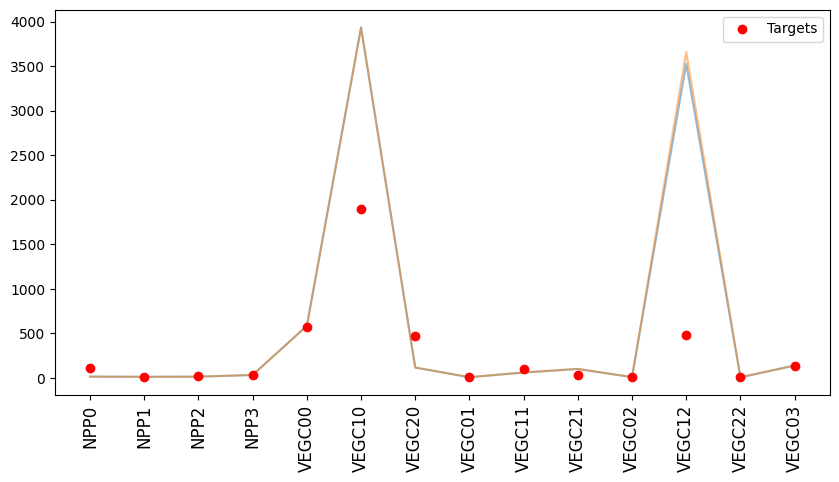

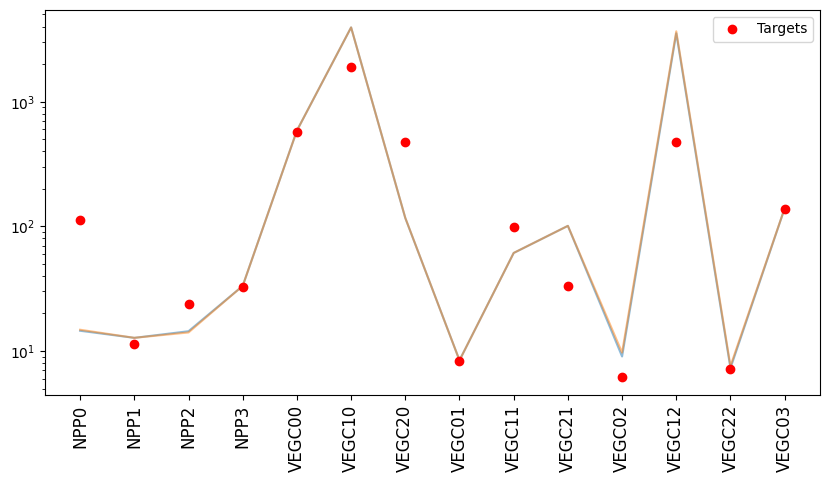

In [21]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [22]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='r2rmse'
nelem=10
order=True

nmax_krb_true_params = [3.38, 1.55, 1.00, 3.55, \
0.0011, 0.0507, 0.0250, 0.0199, 0.0034, 0.0058, 0.0036, 0.0052, 0.0012, 0.0260]
xparams_MD1.sort_values(by=[rmetric],ascending=order)[:10]

,cfall00,cfall01,cfall02,cfall03,cfall10,cfall11,cfall12,cfall20,cfall21,cfall22,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
0,0.0,0.05,0.03,0.02,0.0,0.01,0.0,0.01,0.0,0.02,0.409962,9.738689e+05,0.980235,-0.090038,1.113063,1.496299
1,0.0,0.05,0.02,0.02,0.0,0.01,0.0,0.01,0.0,0.02,0.394932,1.031856e+06,0.978053,-0.105068,1.168806,1.536769


In [23]:
print(df_model.iloc[-1])
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:10]

NPP0       113.08
NPP1        11.30
NPP2        24.02
NPP3        32.41
VEGC00     572.36
VEGC10    1894.03
VEGC20     474.55
VEGC01       8.35
VEGC11      98.90
VEGC21      33.19
VEGC02       6.14
VEGC12     477.80
VEGC22       7.17
VEGC03     136.54
Name: 2, dtype: float64


,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,VEGC02,VEGC12,VEGC22,VEGC03,R2,RMSE,MAPE,COMBINED_ACC,r2rmse,r2rmsemape
0,14.527323,12.743775,14.405883,33.253447,585.538159,3937.215747,116.498877,8.414452,61.116844,100.805230,9.036406,3529.907202,7.285257,139.443468,0.409962,9.738689e+05,0.980235,-0.090038,1.113063,1.496299
1,14.806107,12.749617,14.078322,33.270638,585.520819,3934.811011,116.854448,8.409986,61.147611,100.819908,9.713713,3661.711328,7.574292,139.516650,0.394932,1.031856e+06,0.978053,-0.105068,1.168806,1.536769


## (4) nfall -> NPP, VEGC, VEGN 

In [24]:
model='out-nfall-npp-vegc-vegn.csv'
params='param-nfall-npp-vegc-vegn.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['NPP0','NPP1','NPP2','NPP3',\
                   'VEGC00','VEGC10','VEGC20',\
                   'VEGC01','VEGC11','VEGC21',\
                   'VEGC02','VEGC12','VEGC22',\
                   'VEGC03',\
                   'VEGN00','VEGN10','VEGNC20',\
                   'VEGN01','VEGN11','VEGN21',\
                   'VEGN02','VEGN12','VEGN22',\
                   'VEGN03'
                   ]
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [
               'nfall00','nfall01','nfall02','nfall03',\
               'nfall10','nfall11','nfall12',\
               'nfall20','nfall21','nfall22']
df_param.columns = param_header
df_model.head()

,NPP0,NPP1,NPP2,NPP3,VEGC00,VEGC10,VEGC20,VEGC01,VEGC11,VEGC21,...,VEGN00,VEGN10,VEGNC20,VEGN01,VEGN11,VEGN21,VEGN02,VEGN12,VEGN22,VEGN03
0,133.54158,11.657962,24.52091,29.78982,565.179761,1660.166382,205.984018,8.213946,119.287636,14.215068,...,13.183866,24.88135,4.10422,0.370674,3.39202,0.272668,0.370325,10.032628,0.161987,1.549205
1,113.08000,11.300000,24.02000,32.41000,572.360000,1894.030000,474.550000,8.350000,98.900000,33.190000,...,14.790000,30.26000,9.51000,0.380000,2.60000,0.720000,0.570000,12.530000,0.160000,1.150000


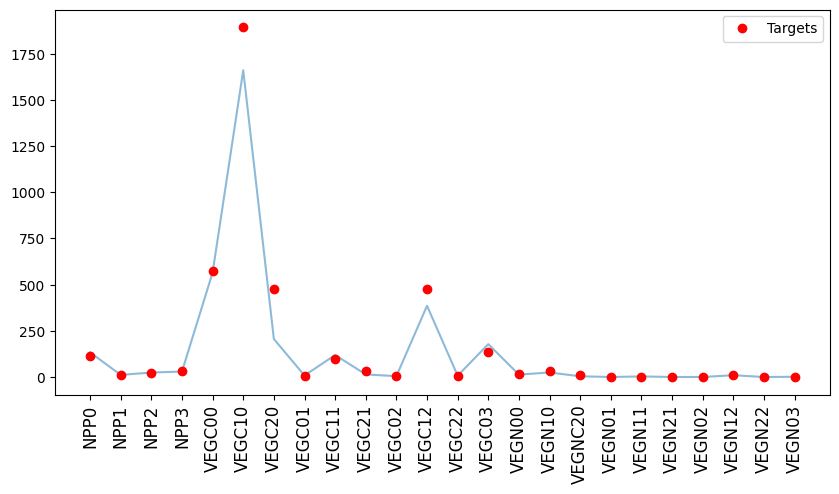

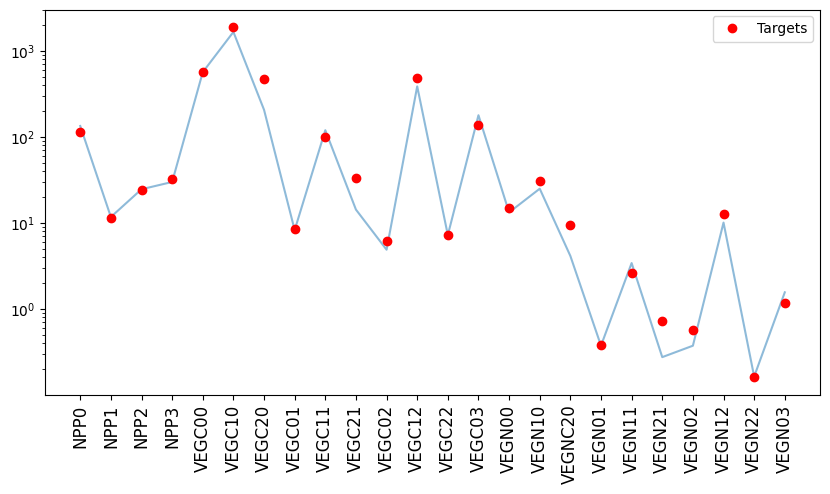

In [25]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

## (5) soil param -> NPP, VEGC,VEGN, SoilC

In [26]:
model='out-csoil.csv'
params='param-csoil-md1-r-EJ.finalresults.csv'
df_model = pd.read_csv(path+model,header=None)
df_param = pd.read_csv(path+params,header=None)
model_header =  ['CarbonShallow','CarbonDeep','CarbonMineralSum','AvailableNitrogenSum']
                
df_model.columns = model_header

df_param = pd.read_csv(path+params,header=None)
param_header = [ 'micbnup', 'kdcrawc', 'kdcsoma', 'kdcsompr', 'kdcsomcr']
               
df_param.columns = param_header
df_model.head()

FileNotFoundError: [Errno 2] No such file or directory: 'csv/out-csoil-md1-r-EJ.finalresults.csv'

In [ ]:
ut.spaghetti_match_plot(df_param,df_model)
ut.spaghetti_match_plot(df_param,df_model,logy=True)

In [ ]:
xparams, ymodel = ut.get_params(df_param,df_model,r2lim=0.9)
# if throws a 'is_first_col' error, do 'pip install --upgrade matplotlib'
ut.plot_hist_dist(xparams)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
[nrows, ncols]=df_param.shape
score=[]
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007]  # kdcsomcr:
rmse=[mean_squared_error(df_param.iloc[i], true_params) for i in range(nrows)]
rmse

df_rmse = pd.Series( rmse,  name = 'RMSE'  )
result = pd.concat([df_param, df_rmse], axis=1)
result

In [ ]:
xparams_MD1, ymodel_MD1 =  ut.get_best_match(df_param,df_model)
xparams_MD1
rmetric='RMSE'
nelem=10
order=True
ymodel_MD1.sort_values(by=[rmetric],ascending=order)[:nelem]

In [ ]:
rmetric='RMSE'
result.sort_values(by=[rmetric],ascending=order)[:nelem]

In [ ]:
true_params=[0.4495,   # micbnup: parameter for soil microbial immobialization of N  .64 
             0.634,    # kdcrawc: raw-material (litter) C decompositin rates at reference condition   .654
             0.54,     # kdcsoma:   0.58
             0.002,    # kdcsompr:   
             0.00007] 